# Proyecto 1 | Inteligencia Artificial
## Integrantes:
- **César Jiménez Salazar** - 2021052709
- **Maynor Martínez Hernández** - 2021052792
- **Fernanda Murillo Mata** - 2222222222

## Descripción
Este proyecto tiene como objetivo principal aplicar diversas técnicas de clasificación de datos
aplicados para dos conjuntos de datos, esto permite explorar diversas herramientas relacionadas al
Machine Learning, y contribuir al desarrollo del conocimiento a partir de la investigación.

## Conjunto de datos
1. **Pima Indians Diabetes Database**
    - **URL:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
    - **Descripción:** Este conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia india Pima.
2. **Heart Failure Prediction Dataset**
    - **URL:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
    - **Descripción:** Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial y se estima que cobran 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por enfermedades cardiovasculares y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca.

## Pima Indians Diabetes Database
### Analisis Exploratorio de Datos
Primero, se importan las librerías necesarias para el análisis exploratorio de datos.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Read the CSV file into a pandas DataFrame
df_diabetes = pd.read_csv('diabetes.csv')

# Display the first few rows of the DataFrame
print(df_diabetes.head(20))

# Get basic statistics of the DataFrame
print(df_diabetes.describe())

# Count the number of missing values in each column
print(df_diabetes.isnull().sum())

# Calculate the correlation between columns
print(df_diabetes.corr())


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [69]:
# Check for duplicate rows and remove them
print(df_diabetes.duplicated().sum())
df_diabetes = df_diabetes.drop_duplicates()

0


In [70]:
# Check for missing values of 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

In [71]:
print(df_diabetes.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0             6    148.0      72.000000       35.00000  155.548223  33.600000   
1             1     85.0      66.000000       29.00000  155.548223  26.600000   
2             8    183.0      64.000000       29.15342  155.548223  23.300000   
3             1     89.0      66.000000       23.00000   94.000000  28.100000   
4             0    137.0      40.000000       35.00000  168.000000  43.100000   
5             5    116.0      74.000000       29.15342  155.548223  25.600000   
6             3     78.0      50.000000       32.00000   88.000000  31.000000   
7            10    115.0      72.405184       29.15342  155.548223  35.300000   
8             2    197.0      70.000000       45.00000  543.000000  30.500000   
9             8    125.0      96.000000       29.15342  155.548223  32.457464   
10            4    110.0      92.000000       29.15342  155.548223  37.600000   
11           10    168.0    

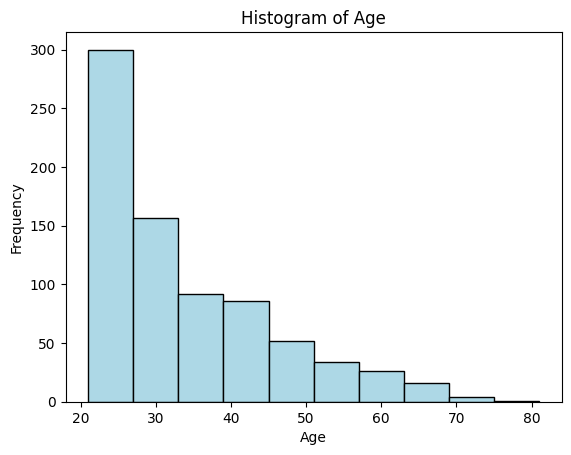

In [10]:
# Plot an histogram of the 'Age' column
plt.hist(df_diabetes['Age'], bins=10, color='lightblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

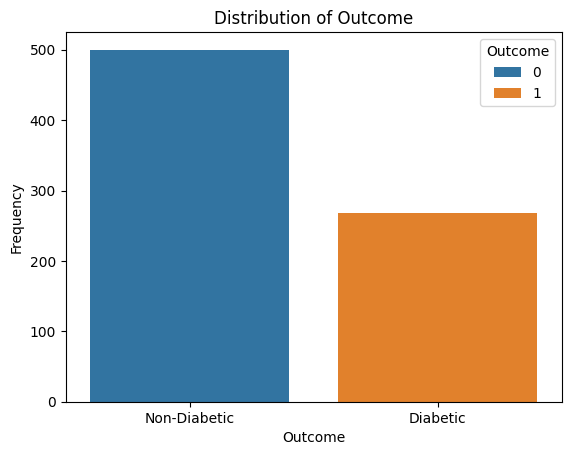

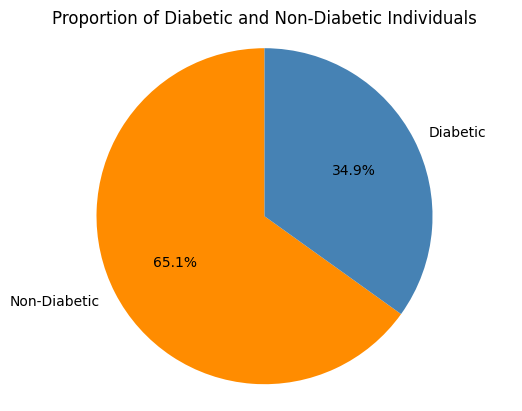

In [25]:
# Plot the distribution of the 'Outcome' column for people with diabetes and people without diabetes
sns.countplot(x='Outcome', data=df_diabetes, hue="Outcome")
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

# Create a pie chart to visualize the proportion of diabetic and non-diabetic individuals
labels = ['Non-Diabetic', 'Diabetic']
sizes = df_diabetes['Outcome'].value_counts()
colors = ['darkorange', 'steelblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diabetic and Non-Diabetic Individuals')
plt.axis('equal')
plt.show()

In [29]:
def plot_stacked_histogram(df, features):
    for feature in features:
        plt.hist([df[df['Outcome'] == 0][feature], df[df['Outcome'] == 1][feature]], bins=10, stacked=True, label=['Non-Diabetic', 'Diabetic'], edgecolor='black')
        plt.title(f'Stacked Histogram of {feature} by Outcome')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend()
        plt.show()


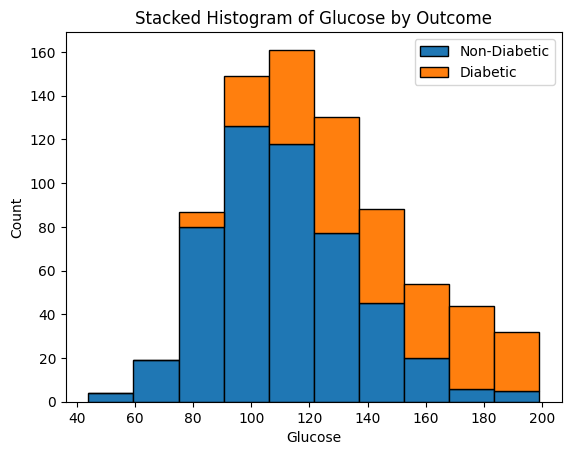

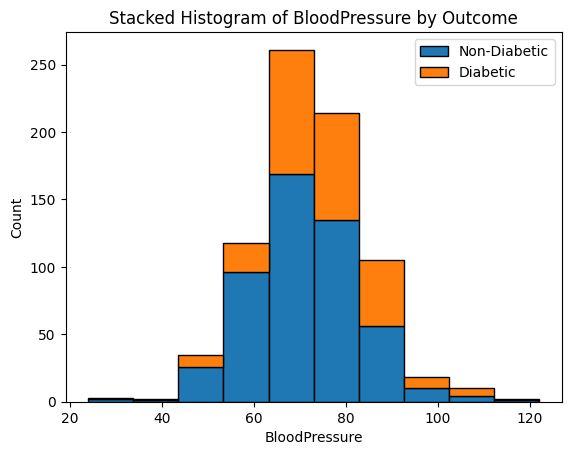

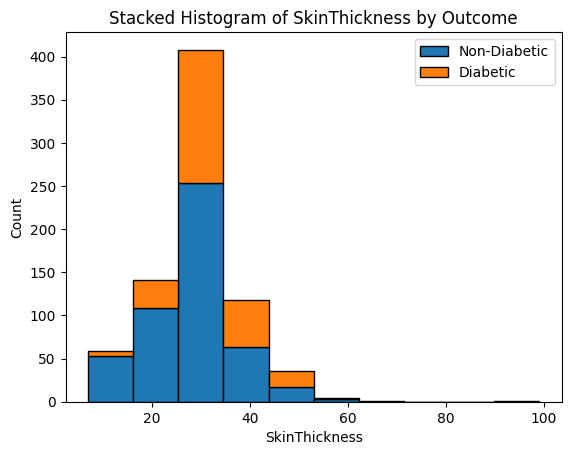

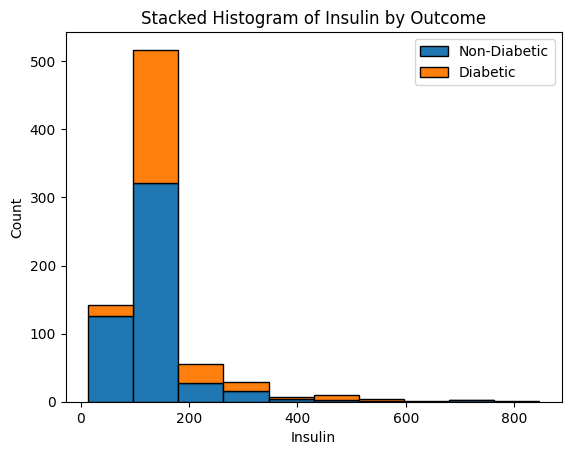

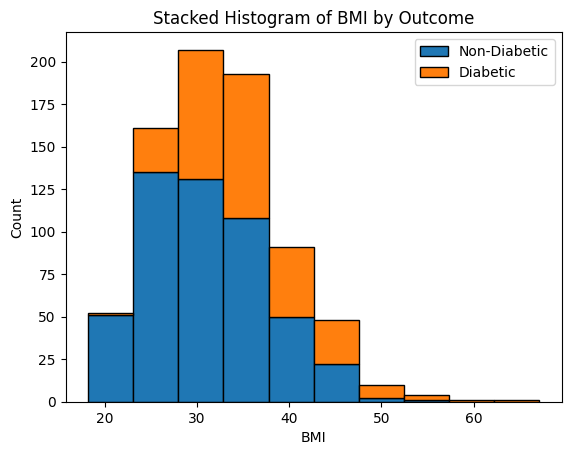

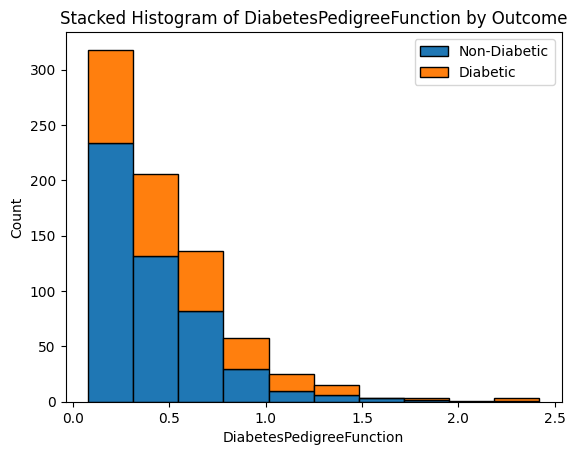

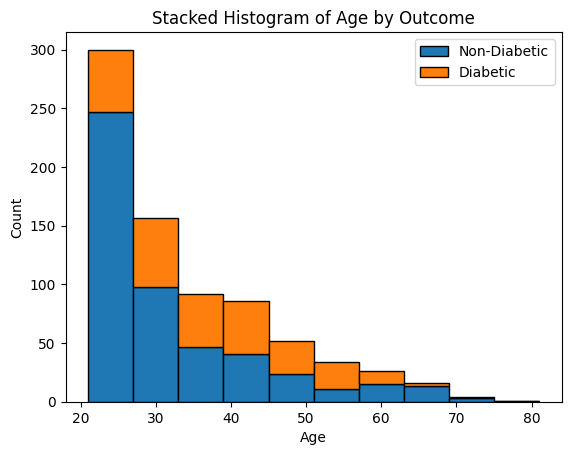

In [30]:
# call the function to plot the stacked histograms
plot_stacked_histogram(df_diabetes, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [58]:
labels = ['Non-Diabetic', 'Diabetic']
colors = ['darkorange', 'steelblue']

def scatter_plots_by_outcome(features):
    for feature in features:
        fig, ax = plt.subplots()  # Create a new figure and axis for each feature

        for outcome, color in zip([0, 1], colors):
            ax.scatter(df_diabetes[df_diabetes['Outcome'] == outcome][feature],
                       df_diabetes[df_diabetes['Outcome'] == outcome]['Age'],
                       c=color, label=labels[outcome])

        ax.set_title(f'Scatter Plot of {feature} vs Age')
        ax.set_xlabel(feature)
        ax.set_ylabel('Age')
        ax.legend()

        plt.show()  # Show the plot after adding all data points

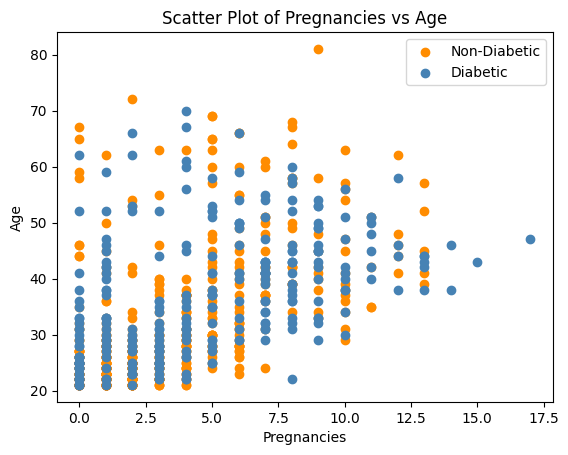

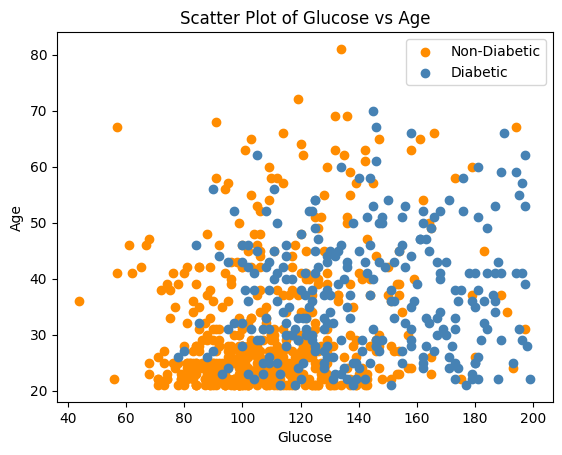

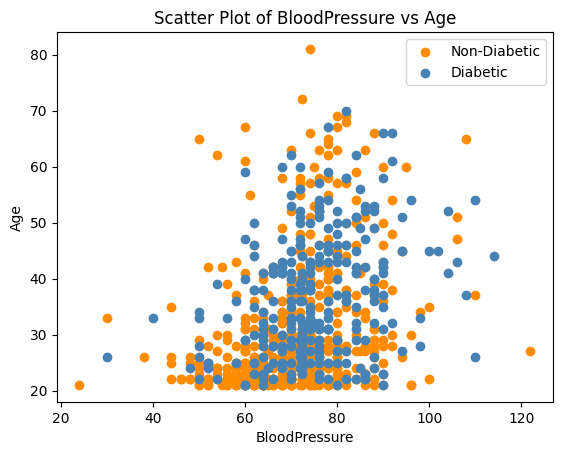

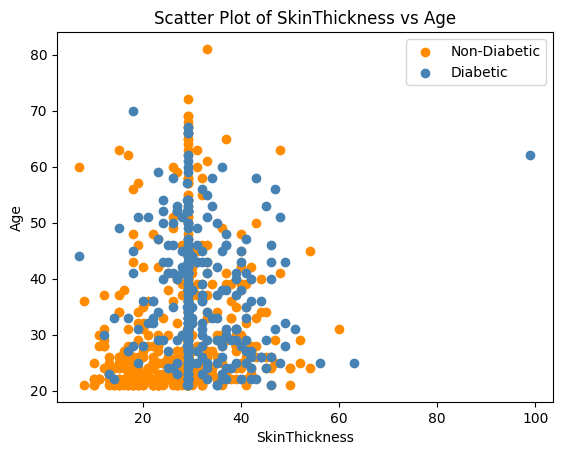

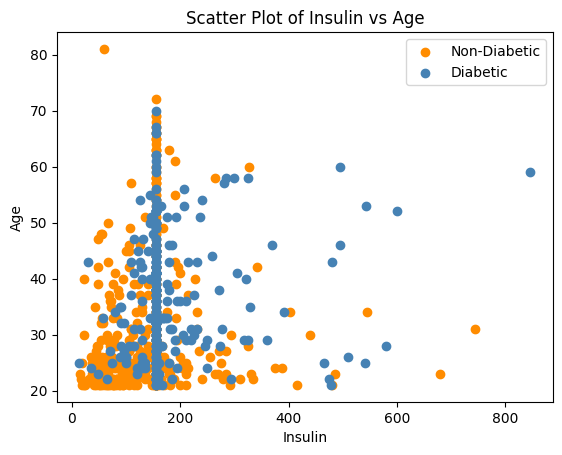

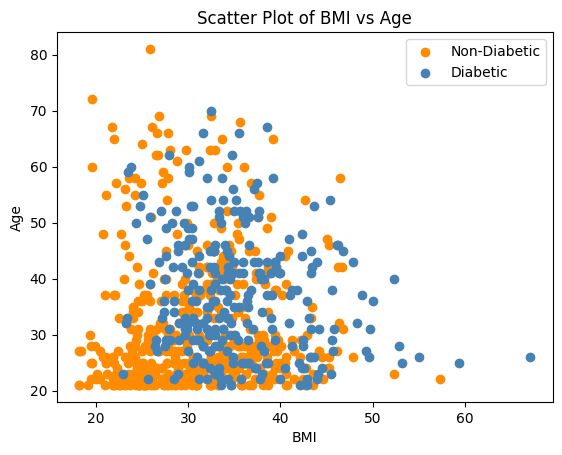

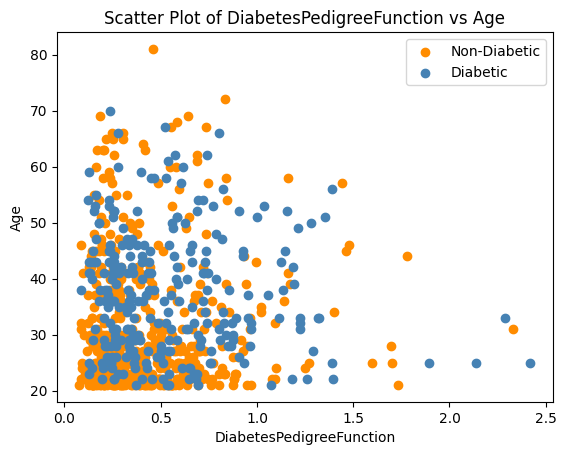

In [73]:
# Call the function to plot the scatter plots
scatter_plots_by_outcome(['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'])

## Heart Failure Prediction Dataset
### Analisis Exploratorio de Datos
Primero, se importan las librerías necesarias para el análisis exploratorio de datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the CSV file into a pandas DataFrame
df_heart = pd.read_csv('heart.csv')

# Display the first few rows of the DataFrame
print(df_heart.head())

# Get basic statistics of the DataFrame
print(df_heart.describe())

# Count the number of missing values in each column
print(df_heart.isnull().sum())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368 